In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt

In [51]:
def parser_date(input_date):
    date1 = input_date.split('-')
    date2 = input_date.split('/')
    date3 = re.findall(r'\d+', input_date)
    if(len(date1) == 3):
        m = int(date3[0])
        d = int(date3[1])
        y = int(date3[2])
        date_str = '{:04}{:02}{:02}'.format(y,m,d)
    elif(len(date2) == 3):
        y = int(date3[0])
        m = int(date3[1])
        d = int(date3[2])
        date_str = '{:04}{:02}{:02}'.format(y,m,d)
    else:
        y = int(date3[0])
        m = int(date3[1])
        d = int(date3[2])
        date_str = '{:04}{:02}{:02}'.format(y,m,d)
    return date_str


data_dir = './'
filenames = [] 
labels = []
pd_data1 = pd.read_csv(os.path.join(data_dir, 'data1.csv'),  encoding = "utf-8")
print(pd_data1.columns)
pd_data2 = pd.read_csv(os.path.join(data_dir, 'data2.csv'),  encoding = "utf-8")
pd_data3 = pd.read_csv(os.path.join(data_dir, 'data3.csv'),  encoding = "utf-8")

ids = pd_data1['id'].to_numpy()[1:]
dates = pd_data1['date'].to_numpy()[1:]

label_a1 = pd_data1['Label A1'].to_numpy()[1:]
label_b1 = pd_data1['Label B8 (或者簡稱 Label C)'].to_numpy()[1:]

assert(len(ids) == len(dates))
for i, id, date in zip((range(len(ids))), ids, dates):
    #print(i, type(date), date)
    if(isinstance(date, str)):
        date = parser_date(date)
        possible_img = glob.glob(os.path.join('./mandible', '{}_{}_*.png'.format(id, date)))
        for img_path in possible_img:
            filenames.append(img_path)

            if(label_a1[i] == 'Y'):
                a1 = 1
            else:
                a1 = 0

            if(label_b1[i] == 'Y'):
                b1 = 1
            else:
                b1 = 0
            labels.append([a1, b1])

            #img = Image.open(img_path)
            #img = np.array(img)
            #print(img.shape)

ids = pd_data2['id'].to_numpy()[1:]
dates = pd_data2['date'].to_numpy()[1:]

label_a1 = pd_data2['Label A1'].to_numpy()[1:]
label_b1 = pd_data2['Label B8 (或者簡稱 Label C)'].to_numpy()[1:]

assert(len(ids) == len(dates))
for i, id, date in zip((range(len(ids))), ids, dates):
    #print(i, type(date), date)
    if(isinstance(date, str)):
        date = parser_date(date)
        possible_img = glob.glob(os.path.join('./mandible', '{}_{}_*.png'.format(id, date)))
        for img_path in possible_img:
            filenames.append(img_path)

            if(label_a1[i] == 'Y'):
                a1 = 1
            else:
                a1 = 0

            if(label_b1[i] == 'Y'):
                b1 = 1
            else:
                b1 = 0
            labels.append([a1, b1])



filename = pd_data3['filename'].to_numpy()[1:]
label_a1 = pd_data3['Label A1'].to_numpy()[1:]
label_b1 = pd_data3['Label B8 (或者簡稱 Label C)'].to_numpy()[1:]


for i in range(len(filename)):
    #print(i, type(date), date)
    if(isinstance(filename[i], str)):
        filenames.append(os.path.join('./mandible', str(filename[i])+'.png'))

        if(label_a1[i] == 'Y'):
            a1 = 1
        else:
            a1 = 0

        if(label_b1[i] == 'Y'):
            b1 = 1
        else:
            b1 = 0
        labels.append([a1, b1])

print('lenlen', len(labels))

Index(['A=A1; B=B1; C=B8', 'Unnamed: 1', 'id', 'date', 'Label A1', 'Label A2',
       'Label A3', 'Label A4 (不看)', 'Label B1', 'Label B2', 'Label B3',
       'Label B4', 'Label B5', 'Label B6', 'Label B7',
       'Label B8 (或者簡稱 Label C)', 'Label B9 ', 'Label B10 (不看)', 'Label B11',
       'Label B12', 'Label B13', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')
lenlen 211


In [52]:
print(len(filenames))
print(labels[:5])
print(filenames[:5])

211
[[0, 0], [0, 0], [0, 0], [1, 1], [1, 0]]
['./mandible\\3147916_20201209_CR_1_1.png', './mandible\\6510414_20201209_CR_1_1.png', './mandible\\6603343_20201209_PX_1_1.png', './mandible\\6807058_20201209_PX_1_1.png', './mandible\\4249331_20201209_PX_1_1.png']


In [53]:
b1p = []
b1n = []

for idx, i in enumerate(filenames):
    img = cv2.imread(i)
    try:
        tb = np.sum(img)
        area = np.sum(img > 0)
    
        if labels[idx][1] == 1:
            b1p.append(tb / area)
        else:
            b1n.append(tb / area)
            
    except Exception as e:
        print(e)
        print(i)

'>' not supported between instances of 'NoneType' and 'int'
./mandible\2295172_20190225_PX_1_1.png
'>' not supported between instances of 'NoneType' and 'int'
./mandible\2295172_20191216_PX_1_1.png
'>' not supported between instances of 'NoneType' and 'int'
./mandible\5146742_20070301_CR_1_1.png


129.41468680043388
12.317084033974899
126.14490883050742
12.896413846801378
45
163


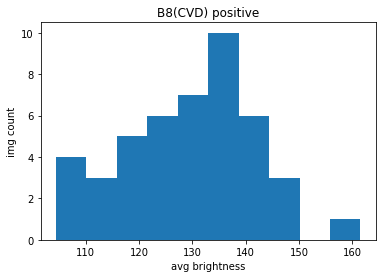

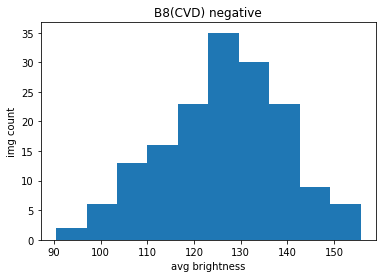

In [55]:
print(np.mean(b1p))
print(np.std(b1p))
print(np.mean(b1n))
print(np.std(b1n))


print(len(b1p))
print(len(b1n))

plt.title('B8(CVD) positive')
plt.xlabel('avg brightness')
plt.ylabel('img count')
plt.hist(b1p)
plt.show()

plt.title('B8(CVD) negative')
plt.xlabel('avg brightness')
plt.ylabel('img count')
plt.hist(b1n)
plt.show()

In [40]:
a1p = []
a1n = []

for idx, i in enumerate(filenames):
    img = cv2.imread(i)
    try:
        tb = np.sum(img)
        area = np.sum(img > 0)
    
        if labels[idx][0] == 1:
            a1p.append(tb / area)
        else:
            a1n.append(tb / area)
            
    except Exception as e:
        print(e)
        print(i)

'>' not supported between instances of 'NoneType' and 'int'
./mandible\2295172_20190225_PX_1_1.png
'>' not supported between instances of 'NoneType' and 'int'
./mandible\2295172_20191216_PX_1_1.png
'>' not supported between instances of 'NoneType' and 'int'
./mandible\5146742_20070301_CR_1_1.png


128.79320626459722
10.888144161831464
125.28272054595384
14.035604939423013
93
115


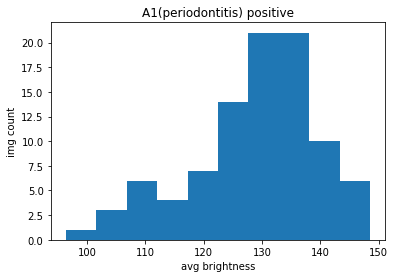

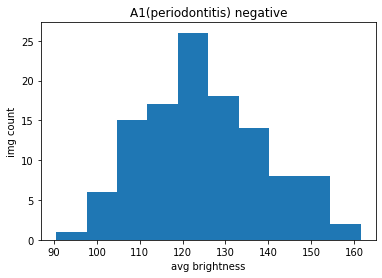

In [43]:
print(np.mean(a1p))
print(np.std(a1p))
print(np.mean(a1n))
print(np.std(a1n))


print(len(a1p))
print(len(a1n))

plt.title('A1(periodontitis) positive')
plt.xlabel('avg brightness')
plt.ylabel('img count')
plt.hist(a1p)
plt.show()
plt.title('A1(periodontitis) negative')
plt.xlabel('avg brightness')
plt.ylabel('img count')
plt.hist(a1n)
plt.show()